## 1. Setup enviorment

In [1]:
%cd ..

/home/datascience/TOP 10 Municipalities Models


In [2]:
from Preprocessing.time_series_preprocessing import get_dengue_dataset, get_municipality_name
from Preprocessing.time_series_preprocessing import preprocess_dataset_to_time_series

from Models.LSTM import create_model, train_model
import tensorflow as tf

from Utils.test_lstm import evaluate, plot_predictions, calculate_mean_std, evaluate_lstm_for_city

import pandas as pd
import os
import numpy as np

### Constants

In [3]:
""" Read Dataset:"""

embeddings = 'Embeddings/variational_autoencoder/variational_autoencoder_ResNet50V2__224_1024_3Bands.csv'
temp_prec = None #['../Tabular_data/precipitation_all.csv', '../Tabular_data/temperature_all 2.csv']
static = None #'../Tabular_data/dengue_tabular.csv'
labels = '../Tabular_data/dengue_tabular.csv'

# Get list of municipalities:
Municipalities = list(pd.unique(pd.read_csv(embeddings)['Municipality Code']))

""" Dataset Preprocessing:"""
train_percentage = 80
T = 3
autoregressive = False
feature_range = (-1, 1)
fusion = None

""" Model Parameters:"""
model = 'LSTM'

lstm_layers=[1000, 500]
nn_layers=[250, 120, 1]
dense_acivation='relu'
recurrent_cells=model
bidirectional=False

""" Tests: """
n_tests = 5

## Create and Evaluate Model for a City

In [4]:
def run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=True, epochs=100, batch_size=16, n_tests=3, plot_samples=True, fusion='late', temp_prec=None, static=None):
    results = {}
    
    if type(embeddings) == list:
        for embedding in embeddings:
            results[embedding] = {}
            if type(Municipality) == list:
                for municipality in Municipality:
                    rmse, mape, smape, r2 = evaluate_lstm_for_city(labels, embedding, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion, temp_prec=temp_prec, static=static)
                    results[embedding][municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape, 'r2': r2}
            else:
                rmse, mape, smape, r2 = evaluate_lstm_for_city(labels, embedding, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion, temp_prec=temp_prec, static=static)
                results[embedding][Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape, 'r2': r2}
    else:
        if type(Municipality) == list:
            for municipality in Municipality:
                rmse, mape, smape, r2 = evaluate_lstm_for_city(labels, embeddings, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion, temp_prec=temp_prec, static=static)
                results[municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape, 'r2': r2}
        else:
            rmse, mape, smape, r2 = evaluate_lstm_for_city(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion, temp_prec=temp_prec, static=static)
            results[Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape, 'r2': r2}
    
    return results

## Run Experiments

In [5]:
# Get list of embeddings:
def get_list_embeddings(embeddings_dir):
    embeddings_dir = 'Embeddings/'
    embeddings = []

    for embedding in os.listdir(embeddings_dir):
        embeddings.append(os.path.join(embeddings_dir, embedding))

    return embeddings

#embeddings = get_list_embeddings(embeddings_dir)

In [6]:
# Get list of municipalities:
Municipality = list(pd.unique(pd.read_csv('Embeddings/ResNet50V2_224_1024.csv')['Municipality Code']))

####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
-----Embeddings/variational_autoencoder/variational_autoencoder_ResNet50V2__224_1024_3Bands.csv-----
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Cúcuta-----------------------------------------------
####################################################################################################
Obtaining dataframe for the city of 54001 - Cúcuta only...
The train shape is: (130, 1025)
The test shape is: (33, 1025)
The shape of the features is (128, 3072)
The shape of the labels is (128, 1)
The shape of the features is (31, 3072)
The shape of the labels is (31, 1)
The initial shapes are:
The train shape is (128, 3072)
The test shape is (31, 3072)
-----------------------
The Final sha

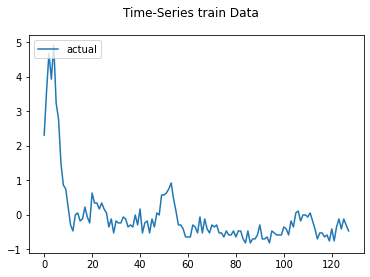

2023-04-29 12:52:10.151498: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-29 12:52:10.151658: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-29 12:52:10.151762: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9e0b1a08816a): /proc/driver/nvidia/version does not exist
2023-04-29 12:52:10.152649: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 12:52:12.637284: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] 

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 64.687
Test RMSE: 84.222
Test sMAPE: 108.286
Test R Squared: -1.297
{'mae': 64.68716359907582, 'rmse': 84.22165955263411, 'smape': 108.28635995883103, 'r2': -1.2965013052107057}


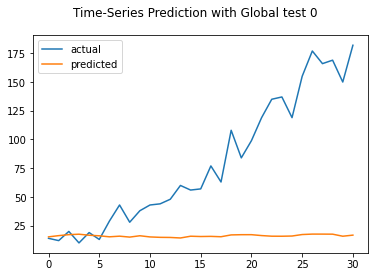

Restoring model weights from the end of the best epoch.
Epoch 00045: early stopping
Test MAE: 61.362
Test RMSE: 81.112
Test sMAPE: 97.591
Test R Squared: -1.130
{'mae': 61.36190672843687, 'rmse': 81.11178595854763, 'smape': 97.59148410900833, 'r2': -1.130036448885218}


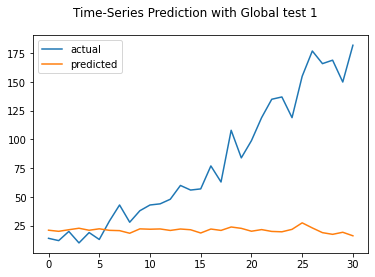

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 64.675
Test RMSE: 84.491
Test sMAPE: 107.692
Test R Squared: -1.311
{'mae': 64.67465185349987, 'rmse': 84.49083269667165, 'smape': 107.69195919598785, 'r2': -1.3112040383696315}


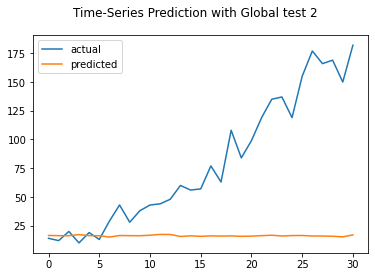

rmse : average=83.275, std=1.533
mae : average=63.575, std=1.565
smape : average=104.523, std=4.908
r2 : average=-1.246, std=0.082
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
-----Embeddings/variational_autoencoder/variational_autoencoder_ResNet50V2__224_1024_3Bands.csv-----
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Neiva------------------------------------------------
#############################################################

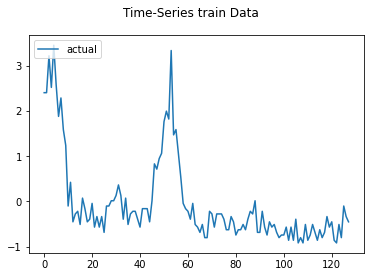

Restoring model weights from the end of the best epoch.
Epoch 00033: early stopping
Test MAE: 5.645
Test RMSE: 7.021
Test sMAPE: 47.657
Test R Squared: 0.057
{'mae': 5.645214449974798, 'rmse': 7.020642064464529, 'smape': 47.656657978388296, 'r2': 0.05737059079735429}


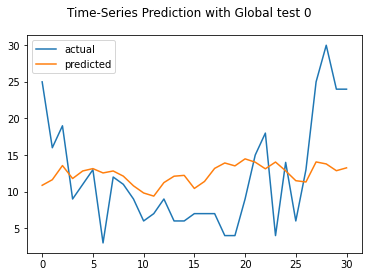

Restoring model weights from the end of the best epoch.
Epoch 00029: early stopping
Test MAE: 6.097
Test RMSE: 7.438
Test sMAPE: 51.298
Test R Squared: -0.058
{'mae': 6.096769917395807, 'rmse': 7.437512126048218, 'smape': 51.2982987753835, 'r2': -0.05789531834298156}


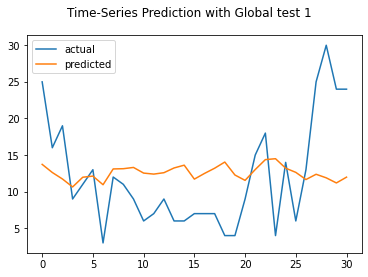

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 8.977
Test RMSE: 9.899
Test sMAPE: 65.870
Test R Squared: -0.874
{'mae': 8.97749174794843, 'rmse': 9.898830847047218, 'smape': 65.87047126904788, 'r2': -0.8739376100508232}


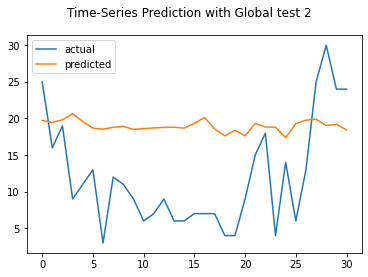

rmse : average=8.119, std=1.270
mae : average=6.906, std=1.476
smape : average=54.942, std=7.869
r2 : average=-0.291, std=0.415
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
-----Embeddings/variational_autoencoder/variational_autoencoder_ResNet50V2__224_1024_3Bands.csv-----
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Medellín----------------------------------------------
################################################################

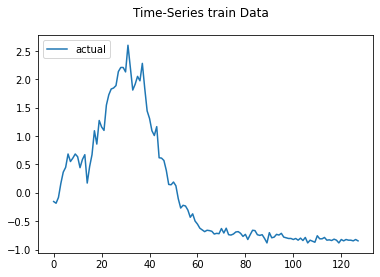

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 145.674
Test RMSE: 145.798
Test sMAPE: 153.117
Test R Squared: -624.357
{'mae': 145.6740432247039, 'rmse': 145.79753714973768, 'smape': 153.1166506390824, 'r2': -624.3566977043681}


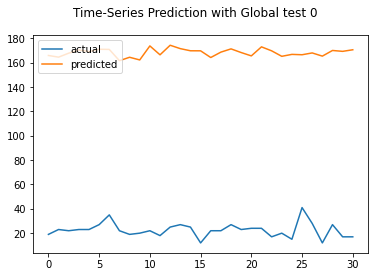

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 146.567
Test RMSE: 146.818
Test sMAPE: 153.275
Test R Squared: -633.141
{'mae': 146.56744335543723, 'rmse': 146.8179727270687, 'smape': 153.27490035719228, 'r2': -633.1410625168223}


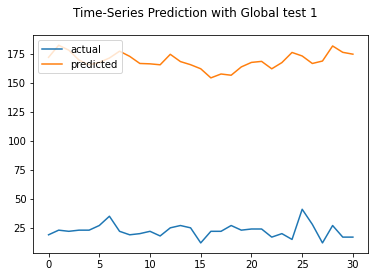

Restoring model weights from the end of the best epoch.
Epoch 00046: early stopping
Test MAE: 73.503
Test RMSE: 76.366
Test sMAPE: 122.527
Test R Squared: -170.564
{'mae': 73.50275494975429, 'rmse': 76.36580120152723, 'smape': 122.52656778953171, 'r2': -170.56364124834013}


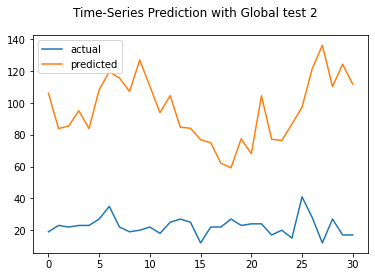

rmse : average=122.994, std=32.974
mae : average=121.915, std=34.234
smape : average=142.973, std=14.458
r2 : average=-476.020, std=216.020
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
-----Embeddings/variational_autoencoder/variational_autoencoder_ResNet50V2__224_1024_3Bands.csv-----
-------------------------------------------Municipality: -------------------------------------------
-------------------------------------------Villavicencio--------------------------------------------
####################################################

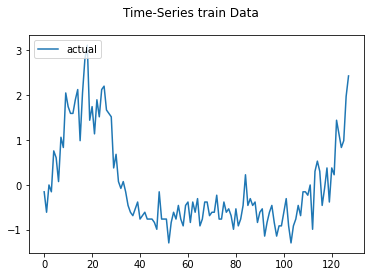

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 34.453
Test RMSE: 39.154
Test sMAPE: 89.581
Test R Squared: -3.575
{'mae': 34.45335031324817, 'rmse': 39.15423681819963, 'smape': 89.58121293731946, 'r2': -3.574988183077914}


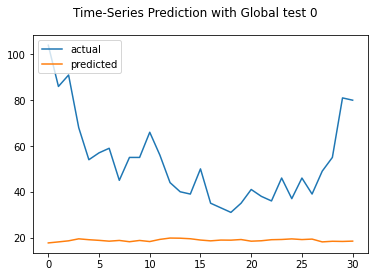

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 34.687
Test RMSE: 39.164
Test sMAPE: 90.855
Test R Squared: -3.577
{'mae': 34.68694729958811, 'rmse': 39.163671772585666, 'smape': 90.85489854435752, 'r2': -3.577193308705202}


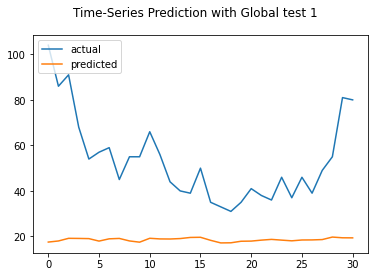

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 33.895
Test RMSE: 38.470
Test sMAPE: 87.533
Test R Squared: -3.417
{'mae': 33.89525764219223, 'rmse': 38.470480565848796, 'smape': 87.53296593002827, 'r2': -3.4165959824474523}


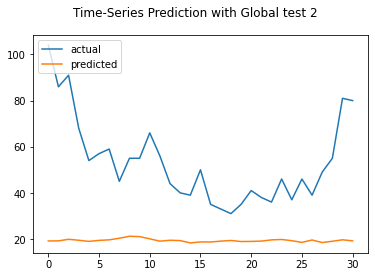

rmse : average=38.929, std=0.325
mae : average=34.345, std=0.332
smape : average=89.323, std=1.368
r2 : average=-3.523, std=0.075
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
-----Embeddings/variational_autoencoder/variational_autoencoder_ResNet50V2__224_1024_3Bands.csv-----
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Bucaramanga---------------------------------------------
##############################################################

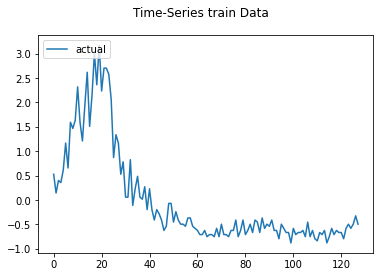

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 8.320
Test RMSE: 10.056
Test sMAPE: 50.385
Test R Squared: -2.344
{'mae': 8.319602166452716, 'rmse': 10.056045660134012, 'smape': 50.38539490109187, 'r2': -2.3436628199928013}


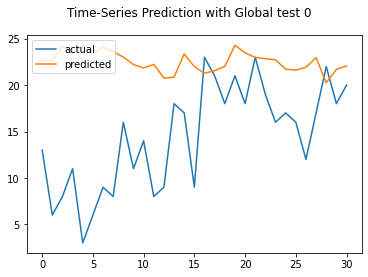

Restoring model weights from the end of the best epoch.
Epoch 00041: early stopping
Test MAE: 4.355
Test RMSE: 5.346
Test sMAPE: 33.456
Test R Squared: 0.055
{'mae': 4.355473456844207, 'rmse': 5.346226004869212, 'smape': 33.455641713289744, 'r2': 0.05493292981594544}


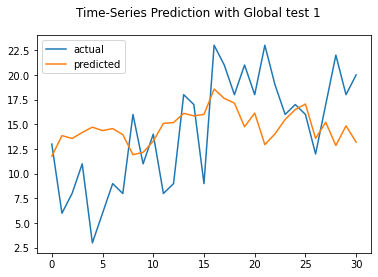

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 8.075
Test RMSE: 9.627
Test sMAPE: 49.583
Test R Squared: -2.064
{'mae': 8.074972398819462, 'rmse': 9.627045948643618, 'smape': 49.58322623282829, 'r2': -2.0644609538639203}


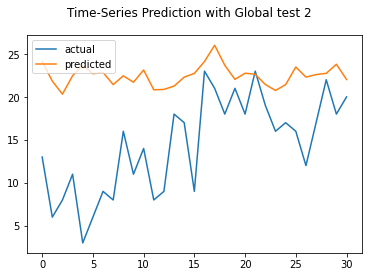

rmse : average=8.343, std=2.126
mae : average=6.917, std=1.814
smape : average=44.475, std=7.799
r2 : average=-1.451, std=1.071
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
-----Embeddings/variational_autoencoder/variational_autoencoder_ResNet50V2__224_1024_3Bands.csv-----
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Barranquilla--------------------------------------------
################################################################

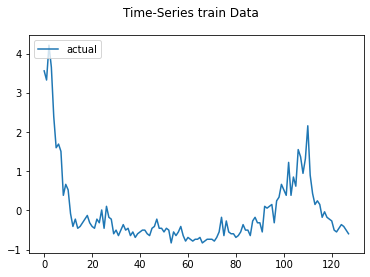

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Test MAE: 23.517
Test RMSE: 29.661
Test sMAPE: 68.411
Test R Squared: -1.676
{'mae': 23.51672597085276, 'rmse': 29.660826075147178, 'smape': 68.41114468872448, 'r2': -1.6764183225970606}


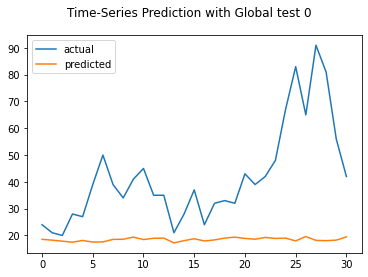

Restoring model weights from the end of the best epoch.
Epoch 00064: early stopping
Test MAE: 20.408
Test RMSE: 27.442
Test sMAPE: 55.801
Test R Squared: -1.291
{'mae': 20.408375124777518, 'rmse': 27.44204030994372, 'smape': 55.80096359401495, 'r2': -1.290974766197238}


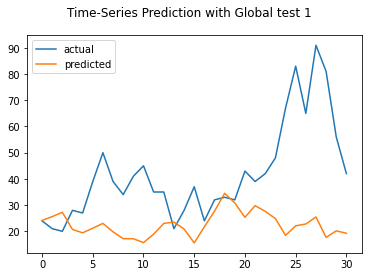

Restoring model weights from the end of the best epoch.
Epoch 00066: early stopping
Test MAE: 15.863
Test RMSE: 22.826
Test sMAPE: 38.757
Test R Squared: -0.585
{'mae': 15.862689479704827, 'rmse': 22.826270935025445, 'smape': 38.75700192405656, 'r2': -0.5851028448257909}


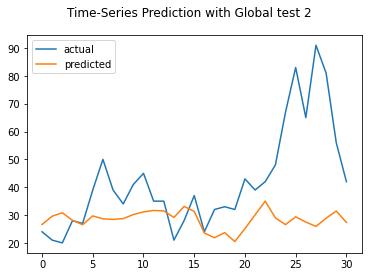

rmse : average=26.643, std=2.847
mae : average=19.929, std=3.143
smape : average=54.323, std=12.151
r2 : average=-1.184, std=0.452
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
-----Embeddings/variational_autoencoder/variational_autoencoder_ResNet50V2__224_1024_3Bands.csv-----
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Montería----------------------------------------------
#############################################################

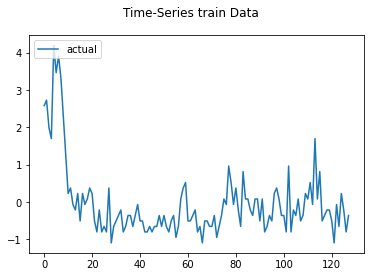

Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Test MAE: 38.483
Test RMSE: 46.818
Test sMAPE: 121.928
Test R Squared: -1.975
{'mae': 38.48257249401462, 'rmse': 46.818300257201265, 'smape': 121.92841511075733, 'r2': -1.9750174600926034}


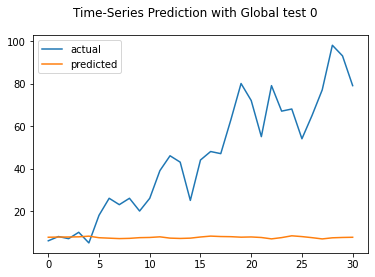

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 38.605
Test RMSE: 46.998
Test sMAPE: 122.268
Test R Squared: -1.998
{'mae': 38.604822543359575, 'rmse': 46.99844605611015, 'smape': 122.26772573481752, 'r2': -1.9979558399004889}


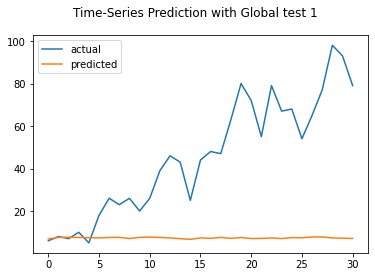

Restoring model weights from the end of the best epoch.
Epoch 00045: early stopping
Test MAE: 34.518
Test RMSE: 42.636
Test sMAPE: 100.668
Test R Squared: -1.467
{'mae': 34.51823388376543, 'rmse': 42.63563508516259, 'smape': 100.66801097328062, 'r2': -1.4671963094937337}


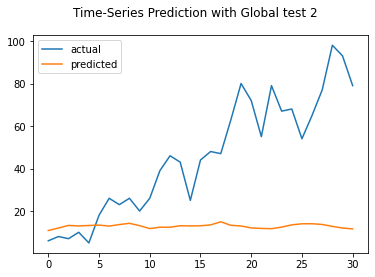

rmse : average=45.484, std=2.016
mae : average=37.202, std=1.898
smape : average=114.955, std=10.103
r2 : average=-1.813, std=0.245
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
-----Embeddings/variational_autoencoder/variational_autoencoder_ResNet50V2__224_1024_3Bands.csv-----
-------------------------------------------Municipality: -------------------------------------------
------------------------------------------------Cali------------------------------------------------
############################################################

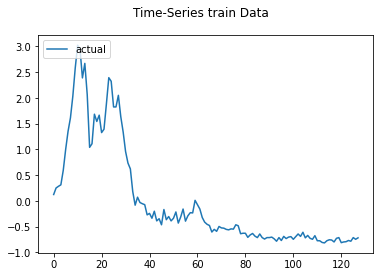

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 165.472
Test RMSE: 166.003
Test sMAPE: 144.709
Test R Squared: -181.560
{'mae': 165.47210496471774, 'rmse': 166.0027849364651, 'smape': 144.70930267468455, 'r2': -181.56035121330802}


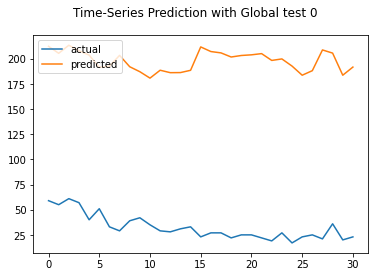

Restoring model weights from the end of the best epoch.
Epoch 00055: early stopping
Test MAE: 130.282
Test RMSE: 136.092
Test sMAPE: 131.931
Test R Squared: -121.700
{'mae': 130.28211925875755, 'rmse': 136.0923867763991, 'smape': 131.93064152834395, 'r2': -121.69966473663058}


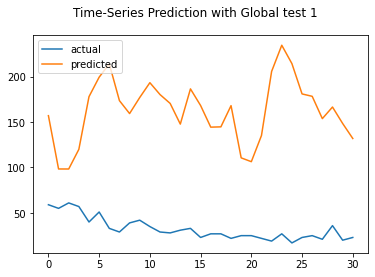

Restoring model weights from the end of the best epoch.
Epoch 00072: early stopping
Test MAE: 44.139
Test RMSE: 52.238
Test sMAPE: 86.356
Test R Squared: -17.078
{'mae': 44.13902288867581, 'rmse': 52.237739528919356, 'smape': 86.3561749524893, 'r2': -17.077753724518587}


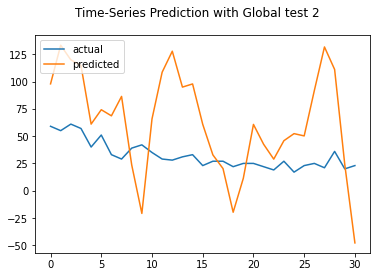

rmse : average=118.111, std=48.153
mae : average=113.298, std=50.969
smape : average=120.999, std=25.045
r2 : average=-106.779, std=67.974
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
-----Embeddings/variational_autoencoder/variational_autoencoder_ResNet50V2__224_1024_3Bands.csv-----
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Ibagué-----------------------------------------------
#####################################################

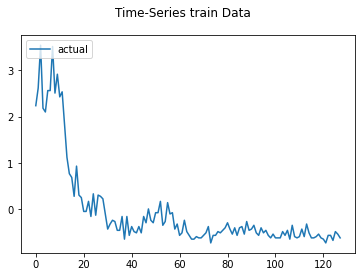

Restoring model weights from the end of the best epoch.
Epoch 00030: early stopping
Test MAE: 4.627
Test RMSE: 5.469
Test sMAPE: 34.103
Test R Squared: -0.064
{'mae': 4.626741809229697, 'rmse': 5.469489185983351, 'smape': 34.103077081249296, 'r2': -0.06421169724294251}


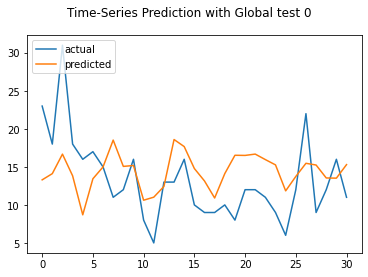

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 18.378
Test RMSE: 19.207
Test sMAPE: 85.397
Test R Squared: -12.124
{'mae': 18.377614728866085, 'rmse': 19.20699861770904, 'smape': 85.39658200773596, 'r2': -12.123615638578167}


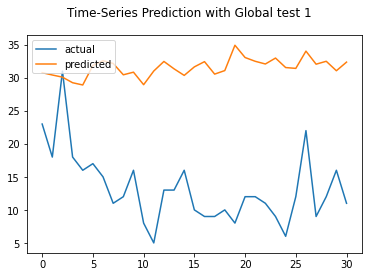

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 17.566
Test RMSE: 18.315
Test sMAPE: 83.550
Test R Squared: -10.933
{'mae': 17.565619437925278, 'rmse': 18.315071151076147, 'smape': 83.55025539374478, 'r2': -10.93305692787042}


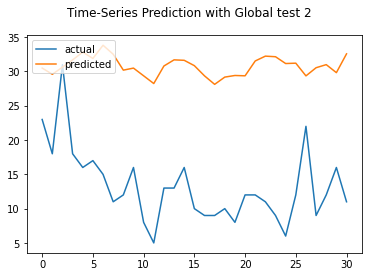

rmse : average=14.331, std=6.276
mae : average=13.523, std=6.300
smape : average=67.683, std=23.757
r2 : average=-7.707, std=5.426
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
-----Embeddings/variational_autoencoder/variational_autoencoder_ResNet50V2__224_1024_3Bands.csv-----
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Itagüí-----------------------------------------------
#############################################################

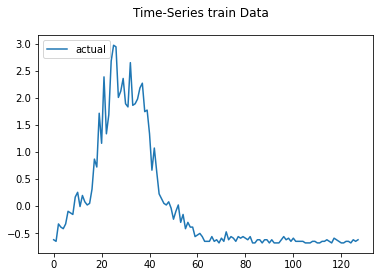

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 23.652
Test RMSE: 23.706
Test sMAPE: 185.145
Test R Squared: -579.708
{'mae': 23.651929363127678, 'rmse': 23.706015293708624, 'smape': 185.1453350007888, 'r2': -579.7076664757321}


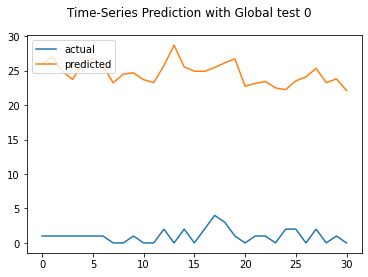

Restoring model weights from the end of the best epoch.
Epoch 00041: early stopping
Test MAE: 4.186
Test RMSE: 4.860
Test sMAPE: 158.496
Test R Squared: -23.410
{'mae': 4.185894758470597, 'rmse': 4.8603124263409265, 'smape': 158.49606992252103, 'r2': -23.410058111032164}


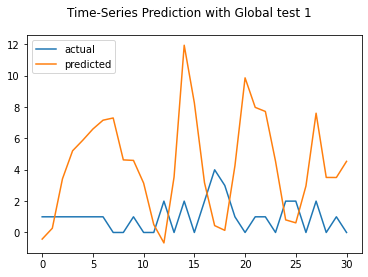

Restoring model weights from the end of the best epoch.
Epoch 00033: early stopping
Test MAE: 2.612
Test RMSE: 2.991
Test sMAPE: 150.774
Test R Squared: -8.246
{'mae': 2.611783742904663, 'rmse': 2.9913082629043957, 'smape': 150.773756237388, 'r2': -8.246189294510783}


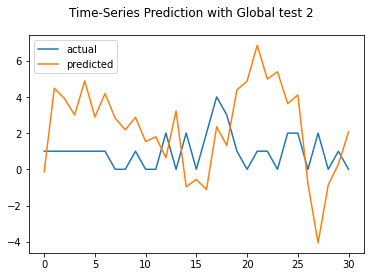

rmse : average=10.519, std=9.356
mae : average=10.150, std=9.569
smape : average=164.805, std=14.724
r2 : average=-203.788, std=265.887
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################


In [7]:
results = run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=None, epochs=100, batch_size=16, n_tests=3, plot_samples=True, fusion=fusion, temp_prec=temp_prec, static=static)

In [8]:
results

{54001: {'rmse': [83.27475940261779, 1.5333958252154658],
  'mape': [63.57457406033751, 1.5646004127123716],
  'smape': [104.52326775460908, 4.907514404718579],
  'r2': [-1.2459139308218516, 0.08215731132231147]},
 41001: {'rmse': [8.118995012519989, 1.269988677236042],
  'mape': [6.906492038439679, 1.4759754814197634],
  'smape': [54.94180934093989, 7.869439860529793],
  'r2': [-0.2914874458654835, 0.4145340378241043]},
 5001: {'rmse': [122.99377035944455, 32.97358491313551],
  'mape': [121.91474717663179, 34.23439093932528],
  'smape': [142.97270626193546, 14.457747509388684],
  'r2': [-476.0204671565102, 216.0203626770868]},
 50001: {'rmse': [38.92946305221136, 0.32457248464376437],
  'mape': [34.34518508500951, 0.3321324192314926],
  'smape': [89.32302580390176, 1.368406499164373],
  'r2': [-3.5229258247435227, 0.07519194179692594]},
 68001: {'rmse': [8.343105871215615, 2.1263390899382335],
  'mape': [6.916682674038795, 1.8137999561666038],
  'smape': [44.474754282403296, 7.7985682